<a href="https://colab.research.google.com/github/ShreedarshM/Hotel-Booking-Analysis/blob/main/Hotel_booking_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Mounting the drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing NumPy and Pandas library
import numpy as np
import pandas as pd


In [ ]:
#Readding the csv file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Folder/Hotel Bookings.csv")

In [ ]:
#Data Exploration
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Data Exploration
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Basic Informations of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###  This dataset contains the information about various hotels across the globe, type of hotel, records on type of customers, number of customers, length of stay, number of adults, children, bookings made across different timelines, etc, etc.,

###  We have only focused on certain variables for our data exploration which are the key aspects which impacts alot for our analysis on our data.
###  So, now, we would proceed further for the steps involved in our analysis.

## <b>Data Cleaning

In [ ]:
#Checking the number of null values
data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
#Checking the number of null values in each columns
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We are replacing all the null values with 'Mean values' for 'Numerical Variable' and with 'Absent' for 'categorical Variables'.

In [ ]:
data["children"].fillna(data["children"].mean(),inplace = True)
data["country"].fillna("Absent",inplace = True)
data["agent"].fillna(data["agent"].mean(),inplace = True)
data["company"].fillna(data["company"].mean(),inplace = True)

In [ ]:
#Ensure there is no null value in our dataset.
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## <b>Data exploration and implementing Visualization

In [ ]:
data.shape

(119390, 32)

In [ ]:
#Checking the value counts for 'is_cancelled" column
booking_cancelled = data["is_canceled"].value_counts()
booking_cancelled

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#Importing the visualization libraries... Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Checking the value counts for number of customers
customer_type = data.customer_type.value_counts()
customer_type

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Text(0, 0.5, 'Number of customers')

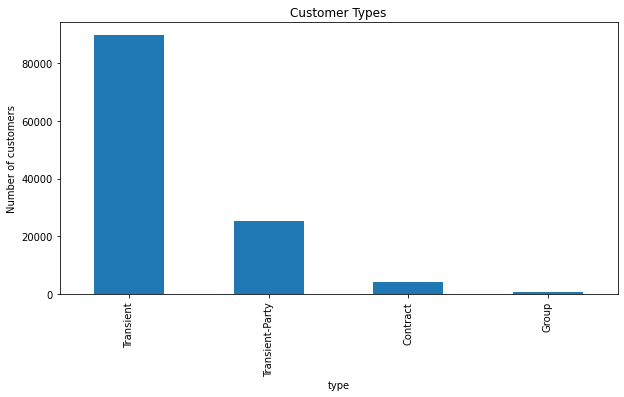

In [ ]:
#Plotting the grapf for type of customers vs number of customers
plt.rcParams['figure.figsize']=(10,5)
customer_type.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('type')
plt.ylabel('Number of customers')


Text(0, 0.5, 'Number of bookings')

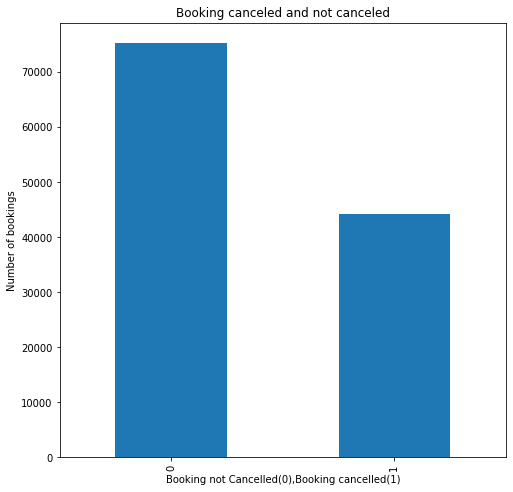

In [ ]:
#Plotting the graph for Booking canceled/ Not canceled vs Number of bookings
plt.rcParams['figure.figsize'] = (8,8)
booking_cancelled.plot(kind = 'bar')
plt.title('Booking canceled and not canceled')
plt.xlabel('Booking not Cancelled(0),Booking cancelled(1)')
plt.ylabel('Number of bookings')

In [ ]:
#Checking the percentage ratio of whether the booking was cancelled or not
booking_percentage = booking_cancelled/booking_cancelled.sum()*100
booking_percentage

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

##  From the above cell, it is evident that approximately 63% of the bookings were not cancelled and 37% of them were cancelled

In [ ]:
#Checking the value counts for deposit type
deposit_type = data['deposit_type'].value_counts
deposit_type

<bound method IndexOpsMixin.value_counts of 0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object>

Text(0.5, 1.0, 'Types of Deposits')

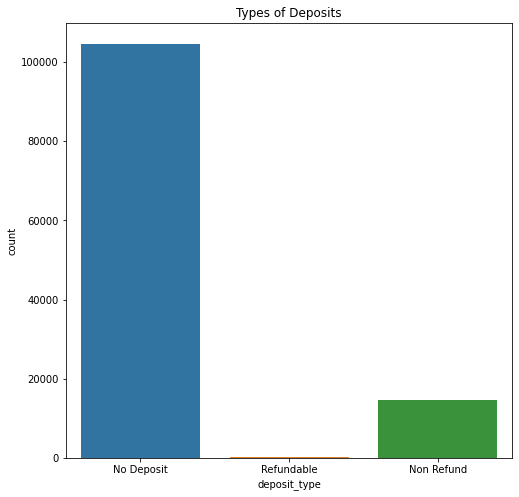

In [ ]:
#Implementing countplot on deposit type
sns.countplot(data = data, x = 'deposit_type').set_title('Types of Deposits')

In [ ]:
#Calculate total number of bookings across different years
year_counts = data['arrival_date_year'].value_counts().sort_index()
year_counts

2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64

##From the above graph we can know that most of the bookings are 'No Deposit' type of transaction

Text(0.5, 1.0, 'Number of bookings on different years')

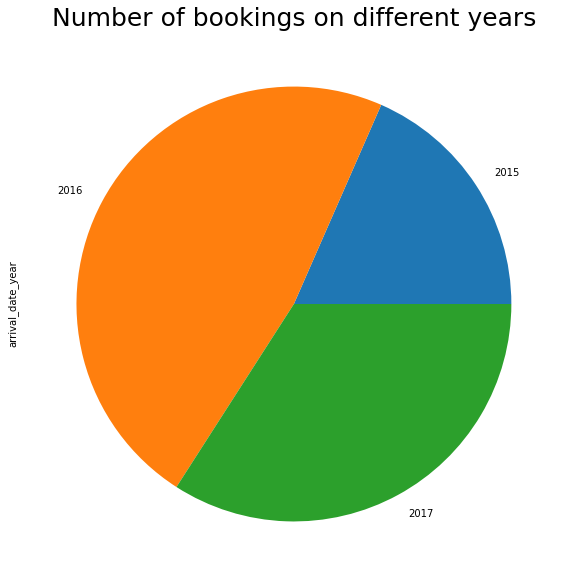

In [ ]:
#Graph representing number of bookings acroos different years
plt.rcParams['figure.figsize'] = (20,10)
year_counts.plot(kind = 'pie')
plt.grid()
plt.title('Number of bookings on different years', fontsize = 25)

##We can tell from the above graph that more than 50 percent of the bookings are done on the year 2016, following 2017 and 2015.

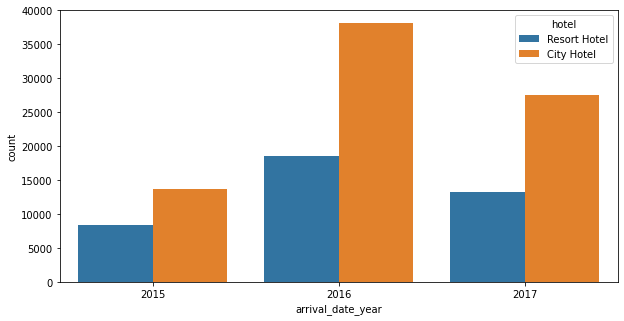

In [ ]:
#Number of bookingas across different year for Resort hotel and city hotel
sns.countplot(data = data, x='arrival_date_year', hue = 'hotel')
plt.rcParams['figure.figsize']=(7,4)

##We can validate from the above graph for the previous pie chart that 2016 was the year most bookings were done.
## And from the above plot, we can infer that city hotel has the demand when compared to resort hotels. The number of bookings for city hotel has gone as high as more than 35000 for the year 2016, more than 25000 for the year 2017 and more than 10000 for the year 2015.
##Whereas, the resorrt hotel bookings were around 17000 for the year 2016, 10000 for 2017 and 8000 for the year 2015 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


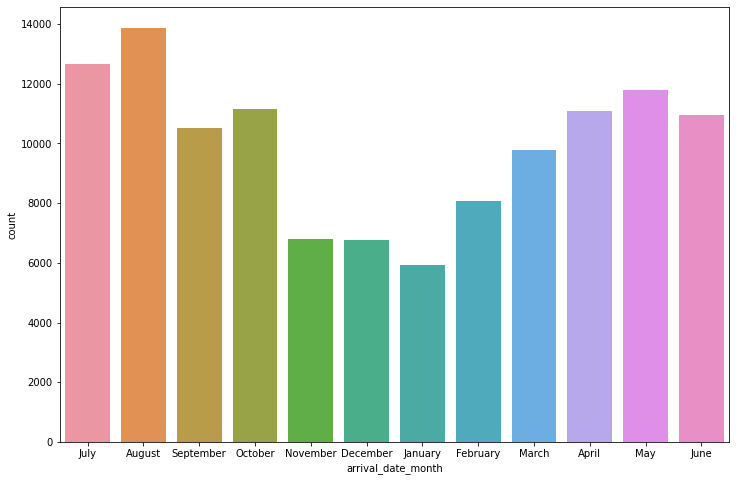

In [ ]:
#Number of bookings done across different months 
sns.countplot(data['arrival_date_month'])
plt.rcParams['figure.figsize']= (5,10)

##The above graph brings the insights about bookings made across different months, So we see that number of bookings are high on the months of July and august following, may, june, september and october.
##The most probable reason for this would be that these months are most ideal seasons for vacation as much weather fluctuation will not be present.

In [ ]:
#Checking number of night stays for all the bookings
total_night_stays = (data['stays_in_week_nights'] + data['stays_in_weekend_nights']).value_counts().head(10).sort_index()
total_night_stays

1     21020
2     27643
3     27076
4     17383
5      7784
6      3857
7      8655
8      1161
10     1139
14      916
dtype: int64

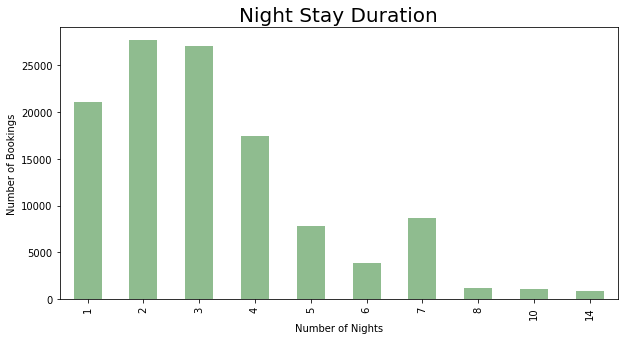

In [ ]:
#Graph representing number of bookings vs numnber of night stayed
total_night_stays.plot(kind='bar', color = 'darkseagreen')
plt.title('Night Stay Duration', fontsize = 20)
plt.ylabel('Number of Bookings')
plt.xlabel('Number of Nights')
plt.rcParams['figure.figsize']=(15,10)

##Most number of people stays for 2-3 days in the hotel and even for one day. 
##The demand for long stay in hotels are very less

In [ ]:
#Top 10 countries which made most number of bookings
country_counts = data['country'].value_counts().head(10)
country_counts

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [ ]:
len(data['country'].value_counts())

178

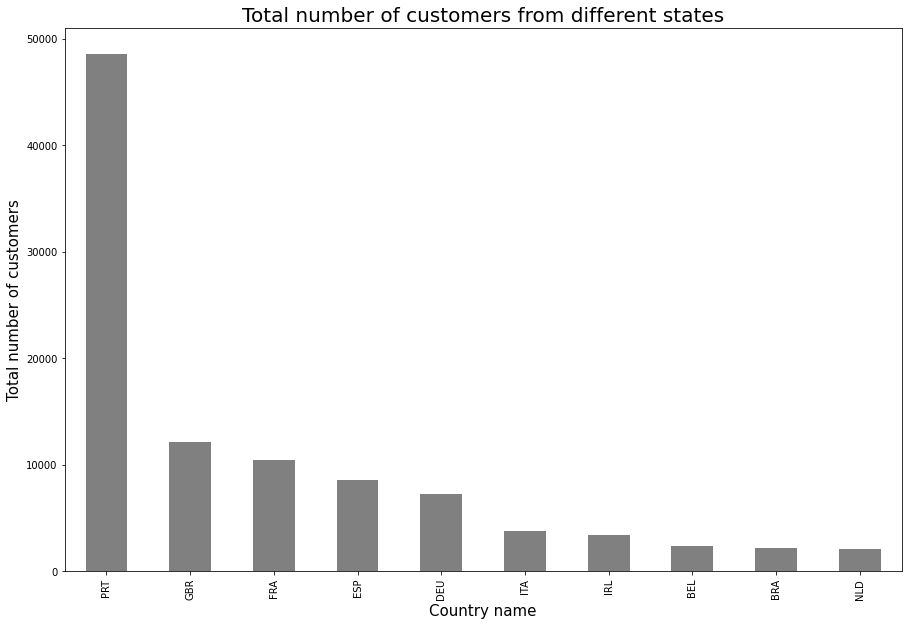

In [ ]:
#Top 10 Countries
country_counts.plot(kind = 'bar', color = 'gray')
plt.title('Total number of customers from different states', fontsize = 20)
plt.xlabel('Country name',fontsize = 15)
plt.ylabel('Total number of customers',fontsize = 15)
plt.rcParams['figure.figsize']=(15,10)

##Portugal leads to a outstanding number of bookings of which not even double of the second position country can beat.
## United Kingdom, France, Spain and Germany are at the position of second, third, fourth and fifth respectively.

Text(0.5, 1.0, 'Average daily rate for different months')

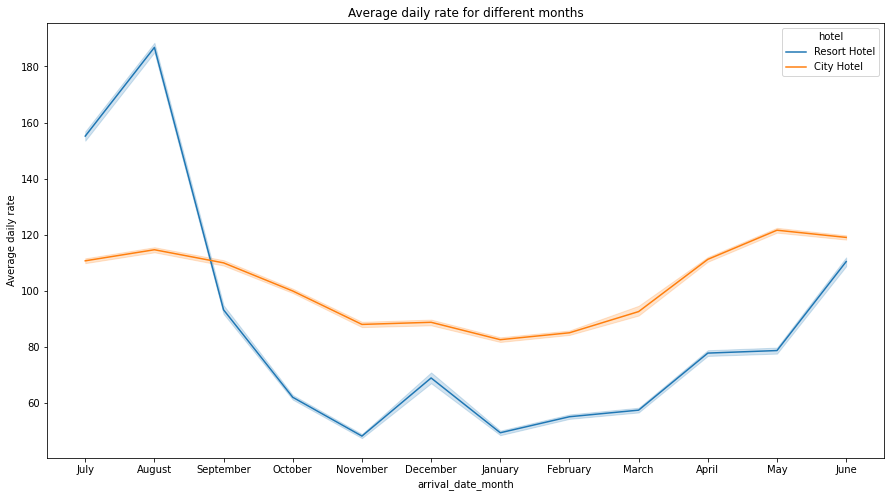

In [ ]:
#Average daily rate for different months for city hotel and resort hotel
plt.figure(figsize = (15,8))
sns.lineplot(x='arrival_date_month', y='adr', data=data, hue = 'hotel')
plt.ylabel('Average daily rate')
plt.title('Average daily rate for different months')

##The average daily rates are high during the months of may, june, july and august for <b> City hotels
##The average daily rates are high during the months of july, august and september for <b> Resort Hotels

In [ ]:
#Checking number of bookings made from different source(Market segments)
market_segment_counts = data['market_segment'].value_counts()
market_segment_counts

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
explode = (0,0.0,0.05,0.05,0.05,0.05,0.05,0.3)

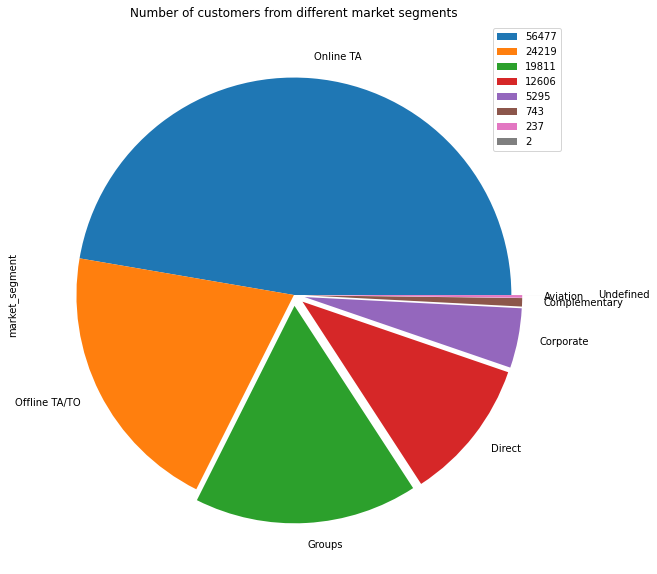

In [ ]:
#Pie chart representing number of customers from different market segments
ax =market_segment_counts.plot(kind = 'pie', figsize=(20,10),explode = explode )
plt.title('Number of customers from different market segments')

ax.legend(data.market_segment.value_counts())

##Onine Travel agency segment gives the high amount of leads for the hotel booking than that of any other sourses of Market segments.
##We can report that we need to target our marketting area on online TA websites or apps and focus majorly on online TA.
##The following majority market segments are offline travel agencies, groups and direct customers.

# <b>Conclusion




1. Majority of the customers are transient, which means **Walk_in Guests** or in a way bookings done by customer through websites without the involvement of middleman.
2. Out of 119000 customer dataset, 75166 customers checked in hotel while 44224 customers cancelled their bookings, that is about 37% of the booking got cancelled whereas 63% customers checked in the hotel. 
3. Majority of the deposit type is of **'No deposit'** type, which itself concludes the high rate of cancellation rate.
4. From the given dataset, we can see 2016 is the year in which hotel bookings are the highest.
5. We can also see the trend in the middle of the year as those season has less weather condition and holidays are more during that season. We can also infer that winter season has the lowest number of bookings around the globe and we can assume it because of the weather condition.
7. City hotels are of in high demand compared to resort in all aspects due to its reliability of majority of the population.
8. Most of the customers prefer to stay for one, two and three nights and majoritily its two and three night which tops.
9. Among the top 10 countries with respect to number of bookings, most of them are European countries which belongs to the list of which Postugal stands first with 48.5k bookings.
10. For resort hotels, ADR is more expensive during June, July, August and September whereas for city hotels, ADR is more expensive during May, June july and August.
So, Overall ADR of both cities are more expensive between May and September.
11. Online Travel agencies providess high amount of leads and customers following Offline TA, Groups, Direct, etc.,
So, we an conclude that we need to focus our marketting area on online TA since majority of the visitors tend to reach out to them.
